In [1]:
import pandas as pd
import numpy as np

# 1. Открываем файл

In [2]:
data = pd.read_csv('adult.csv')

In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
data.info() #нет пустых ячеек


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# 2. Визуализация

In [17]:
import matplotlib.pyplot as plt

#Больше всего сотрудников с образованием "HS-grad"

<AxesSubplot:title={'center':'Количество сотрудников по доходу'}, ylabel='income'>

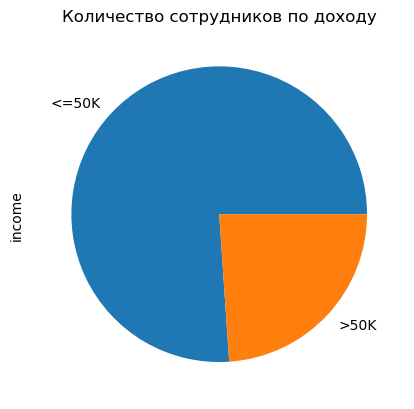

In [18]:
pie_data = data['income'].value_counts()
pie_data.plot(kind='pie', title='Количество сотрудников по доходу')

[Text(0.5, 1.0, 'Распределение уровня дохода по возрасту')]

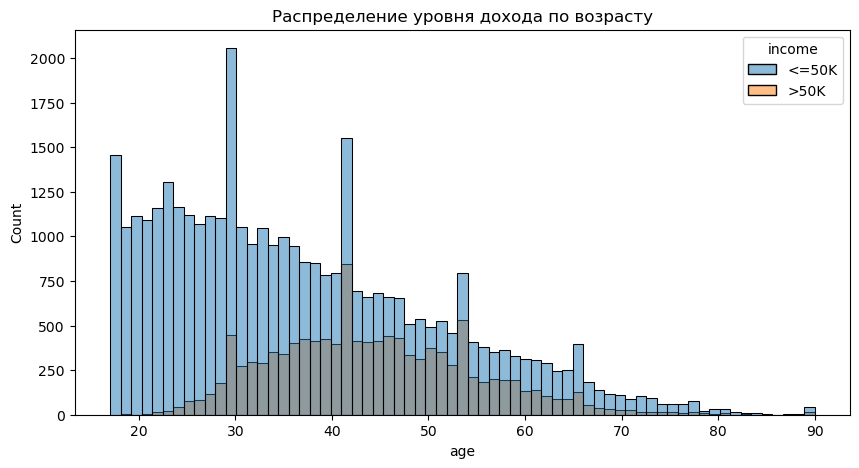

In [47]:
import seaborn as sns
plt.figure(figsize=(10,5))

sns.histplot(data=data, x='age', hue='income').set(title="Распределение уровня дохода по возрасту") 


Видим, что больше всего людей получающих больше 50К, в возрастной группе 40-50 лет, 
а меньше 50К чаще полчают молодые сотрудники до 30 лет

[Text(0.5, 1.0, 'Распределение уровня дохода по полу')]

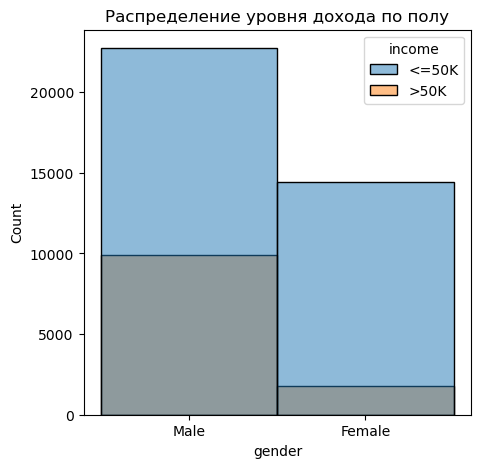

In [46]:
plt.figure(figsize=(5,5))

sns.histplot(data=data, x='gender', hue='income').set(title="Распределение уровня дохода по полу")

Можно сделать вывод, что мужчины чаще получают более высокие зарплаты, чем женщины

# 3. Преобразуем категориальные признаки

In [49]:


X = pd.get_dummies(data, columns = [ 'workclass', 'marital-status', 'occupation',
                    'relationship','gender', 'race', 'education', 'native-country' ])
del X['income']
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
le.fit( data['income'] )

LabelEncoder()

In [29]:
y = pd.Series( data = le.transform( data['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

# 4. Делим на тренировочную и тестовую выборки

In [50]:
from sklearn.model_selection import train_test_split  #Делим на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# 5. Обучаем модель на тренировочных данных

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
model  = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight='balanced'))

In [52]:
model.fit( X_train, y_train )

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

# 6. Делаем проноз на тестовой выбоорке

In [53]:
predictions = model.predict_proba( X_test )

In [54]:
predictions

array([[0.96054017, 0.03945983],
       [0.75982263, 0.24017737],
       [0.02175348, 0.97824652],
       ...,
       [0.18190112, 0.81809888],
       [0.99369562, 0.00630438],
       [0.10236641, 0.89763359]])

In [56]:
model.score(X_test, y_test) #Оцениваем качество модели

0.8154365851161839

# 7. Метод опорных векторов

In [58]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',class_weight='balanced',kernel='sigmoid')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', gamma='auto', kernel='sigmoid'))])

In [59]:
clf.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', gamma='auto', kernel='sigmoid'))])

In [60]:
clf.score(X_test, y_test) #oцениваем качество

0.7701914218446105

In [63]:
from sklearn.preprocessing import MinMaxScaler
clf1 = make_pipeline(MinMaxScaler(), SVC(gamma='auto',class_weight='balanced',kernel='sigmoid')) 
clf1.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc',
                 SVC(class_weight='balanced', gamma='auto', kernel='sigmoid'))])

In [68]:
clf1.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc',
                 SVC(class_weight='balanced', gamma='auto', kernel='sigmoid'))])

In [65]:
clf1.score(X_test, y_test) #оцениваем качество

0.7573958439963149

# Выводы

Оценивая качества моелелй, можно сделать вывод, что в данном  конкретном случае модель логистической регрессии работает точнее и быстрее метода опорных векторов. В самом же методе опорных векторов использование StandardScaler дает бОльшую точность, чем MinMaxScaler